# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [2]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [4]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [5]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The area of a circle  with radius {radius} is {area:.2f}")


The area of a circle  with radius 1 is 3.14
The area of a circle  with radius 2 is 12.57
The area of a circle  with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [1]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tiger_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

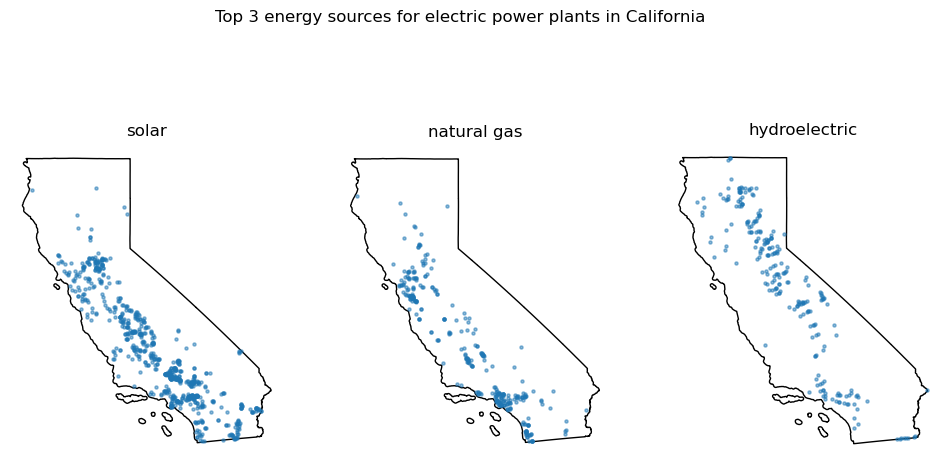

In [2]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

Recommended steps for writing a function:
1. Solve the problem for a specific example
2. Identify which parts of the code need to be generalized
3. Update these parts 
4. Wrap into a function
5. Add additional parameters or assert statements
6. Test function
7. Add a docstring

Example: Obtain the top 3 power sources for any state programatically as a function

### Step 1: Solve for a specific example
Example: Solve this for CA

In [ ]:
state = 'California'
state_power_plants = power_plants[power_plants['state'] == state]

top_sources = state_power_plants['primsource']
                        .value_counts()
                        .index[:3]
                        .tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: Define the function
and 
## Step 4: Adjust parameters

In [14]:
def top3_sources(state, power_plants):
        state_power_plants = power_plants[power_plants['state'] == state]
        top_sources = state_power_plants['primsource'].value_counts().index[:3].tolist()
        return top_sources

In [15]:
top3_sources('Oregon', power_plants)

['solar', 'hydroelectric', 'wind']

## Example

Create a function to produce a plot given a list of primary sources and a state name (Recreate the previous code for any state.)

## Step 1:  Solve an example


In [ ]:
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step 2:

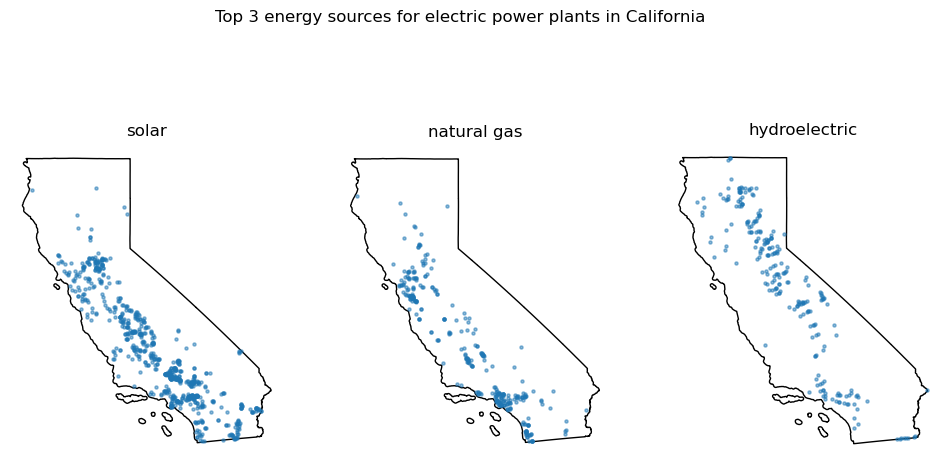

In [ ]:
# Select state power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

##  Step 3

In [ ]:
def plot_top_3_power_sources(state):
    # Select the state and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State's top 3 power sources
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        ca_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

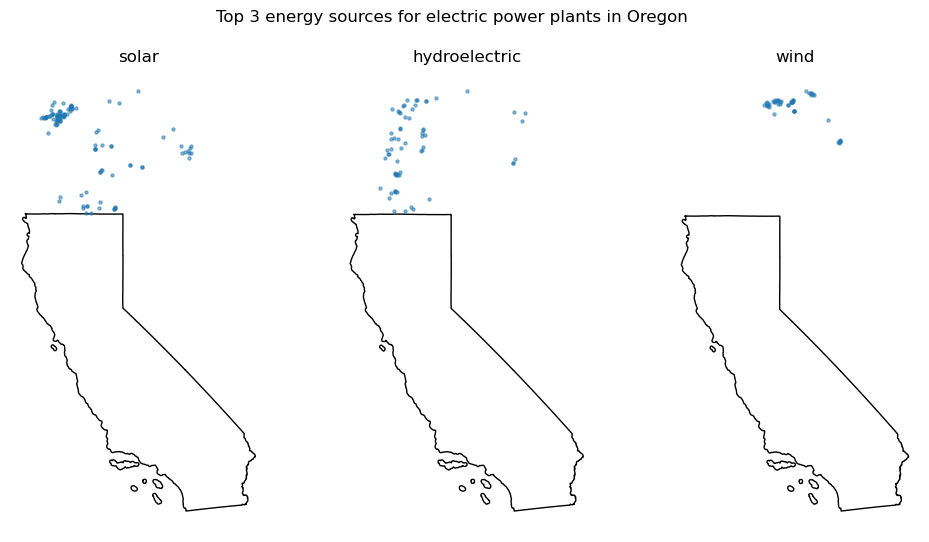

In [27]:
plot_top_3_power_sources('Oregon')

# Example

Create a function called `power_source_counts` that, given a power source, returns a Series with the counts of power plants by state that use that source.

In [54]:
# Generalize  
source = 'wind'
top_states = power_plants[power_plants.primsource == source].state.value_counts()
top_states

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [57]:
# Wrap into a function
def power_source_counts(source, power_plants):
    top_states = power_plants[power_plants.primsource == source].state.value_counts()
    return top_states


In [58]:
power_source_counts('wind', power_plants)

state
Texas             215
Minnesota         122
Iowa              121
California        107
Oklahoma           64
Illinois           50
Oregon             49
Kansas             47
North Dakota       39
Nebraska           34
Michigan           34
Colorado           32
New York           32
Idaho              32
New Mexico         29
Pennsylvania       26
Wyoming            25
South Dakota       23
Washington         23
Ohio               22
Massachusetts      20
Indiana            20
Maine              20
Rhode Island       19
Montana            19
Missouri           14
Wisconsin          12
Hawaii              8
West Virginia       8
Arizona             6
New Hampshire       5
Utah                5
Maryland            5
Vermont             5
Alaska              4
Tennessee           2
New Jersey          2
Puerto Rico         2
Delaware            1
Nevada              1
Virginia            1
North Carolina      1
Connecticut         1
Name: count, dtype: int64

In [50]:
# Select the state
tx_power_plants = power_plants[power_plants['state'] == 'Texas']

tx_wind_sources = tx_power_plants[tx_power_plants['primsource'] == 'wind'].primsource.count()
tx_wind_sources

215

In [51]:
state_power_plants = power_plants[power_plants['state'] == state]

state_wind_sources = state_power_plants[state_power_plants['primsource'] == 'wind'].count()
state_wind_sources

objectid          107
plant_code        107
plant_name        107
utility_id        107
utility_name      107
sector_name       107
street_address    106
city              107
county            107
state             107
zip               107
primsource        107
source_desc       107
tech_desc         107
install_mw        107
total_mw          107
bat_mw              0
bio_mw              0
coal_mw             0
geo_mw              0
hydro_mw            0
hydrops_mw          0
ng_mw               0
nuclear_mw          0
crude_mw            0
solar_mw            0
wind_mw           107
other_mw            0
source            107
period            107
longitude         107
latitude          107
geometry          107
dtype: int64

In [52]:
def state_wind_sources(state):
    state_power_plants = power_plants[power_plants['state'] == state]

    state_wind_sources = state_power_plants[state_power_plants['primsource'] == 'wind'].primsource.count()
    return state_wind_sources

In [53]:
state_wind_sources('Iowa')

121